# Sales Analysis for the Year 2019

## Overview:
This analysis delves into the sales data for the year 2019, aiming to uncover insights and patterns that can inform strategic decisions and optimize business performance.

## Key Questions:
1. **Best Month for Sales:** Which month experienced the highest sales revenue in 2019, and how much was earned during that period?
   
2. **Top Selling City:** Which city emerged as the primary contributor to product sales in 2019?

3. **Optimal Advertisement Timing:** At what time should advertisements be displayed to maximize the probability of customer purchases?

4. **Frequently Sold Together:** Which products were frequently purchased together, indicating potential cross-selling opportunities or product bundles?

5. **Best-Selling Product Analysis:** Which product achieved the highest sales volume in 2019?

This analysis aims to provide actionable insights to enhance sales strategies, improve customer targeting, and drive revenue growth.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter 

# Step 1 - Combine all 2019 Data 

In [2]:
path = "Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

Sales_Year_2019 = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    Sales_Year_2019 = pd.concat([Sales_Year_2019 , current_data])
    
Sales_Year_2019.to_csv("Sales_Year_2019.csv", index=False)
    

In [3]:
All_2019 = pd.read_csv("Sales_Year_2019.csv")
All_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Step 2 - Clean up Data

### Drop NAN

In [4]:
nan_df = All_2019[All_2019.isna().any(axis=1)]
nan_df.head()

All_2019 = All_2019.dropna(how = "all")

### Drop invalid data

In [5]:
All_2019 =All_2019[All_2019['Order Date'].str[0:2] != 'Or']

In [6]:
All_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Question 1: What was the best month for sales? How much was earned that month?

### Add month column

In [7]:
All_2019['Month'] = All_2019['Order Date'].str[0:2]
All_2019['Month'] = All_2019['Month'].astype('int32')
All_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add Sales Column

In [8]:
# change to numbers
All_2019['Quantity Ordered'] = pd.to_numeric(All_2019['Quantity Ordered'])
All_2019['Price Each'] = pd.to_numeric(All_2019['Price Each'])

In [9]:
All_2019['Sales'] = All_2019['Quantity Ordered'] * All_2019['Price Each']

In [10]:
monthly_sales = All_2019.groupby(['Month']).sum()['Sales']
All_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Answer:

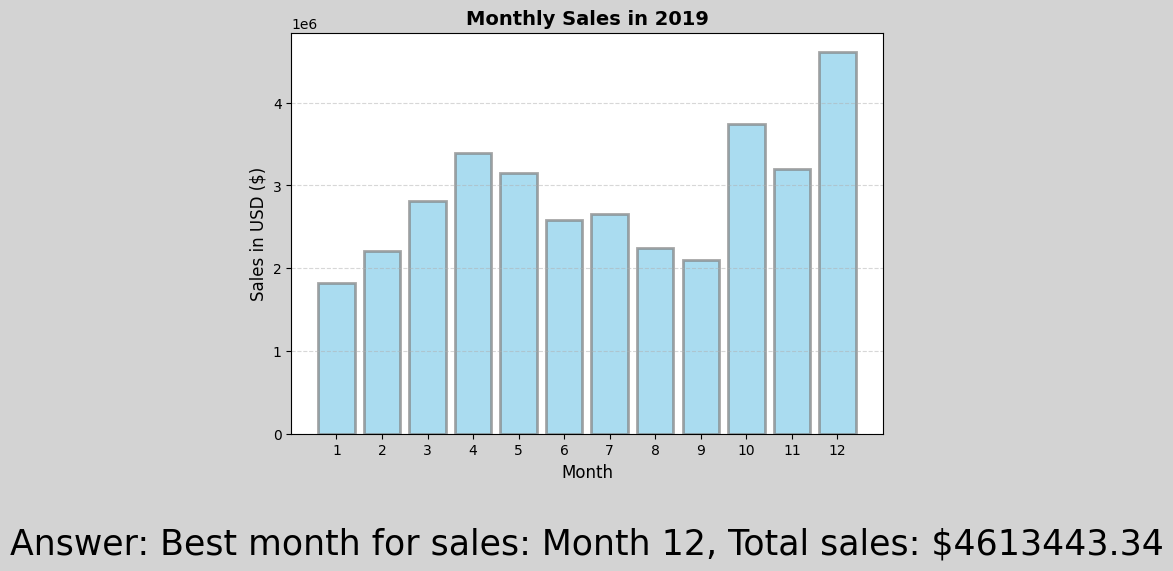

In [11]:
# Define the months range
months = range(1, 13)

# Plotting the bar chart with customizations
plt.figure(figsize=(10, 6), facecolor='lightgrey')  # Adjusting the figure size and setting the background color
plt.bar(months, monthly_sales, color='skyblue', alpha=0.7, edgecolor='gray', linewidth=2)  # Adding edge color to the bars
plt.xticks(months)
plt.ylabel('Sales in USD ($)', fontsize=12)  # Adjusting the font size of the labels
plt.xlabel('Month', fontsize=12)  # Adjusting the font size of the labels
plt.title('Monthly Sales in 2019', fontsize=14, fontweight='bold')  # Adding a title with increased font size and bold style
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding grid lines to the y-axis

# Removing scientific notation from y-axis labels
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=False))

# Find the best month for sales and its corresponding value
best_month = monthly_sales.idxmax()
best_sales = monthly_sales.max()

# Adding text at the bottom of the plot
plt.text(0.5, -0.3, f'Answer: Best month for sales: Month {best_month}, Total sales: ${best_sales:.2f}', transform=plt.gca().transAxes, ha='center', fontsize=25)

plt.tight_layout()  # Adjusting the layout to prevent overlapping labels
plt.show()

## Question 2: What city sold the most product?

### Add city and State column

In [12]:
All_2019['City'] = All_2019['Purchase Address'].str.split(',').str[1]
All_2019['State'] = All_2019['Purchase Address'].str.split(',').str[2].str.split( ).str[0]

All_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


# Answer:

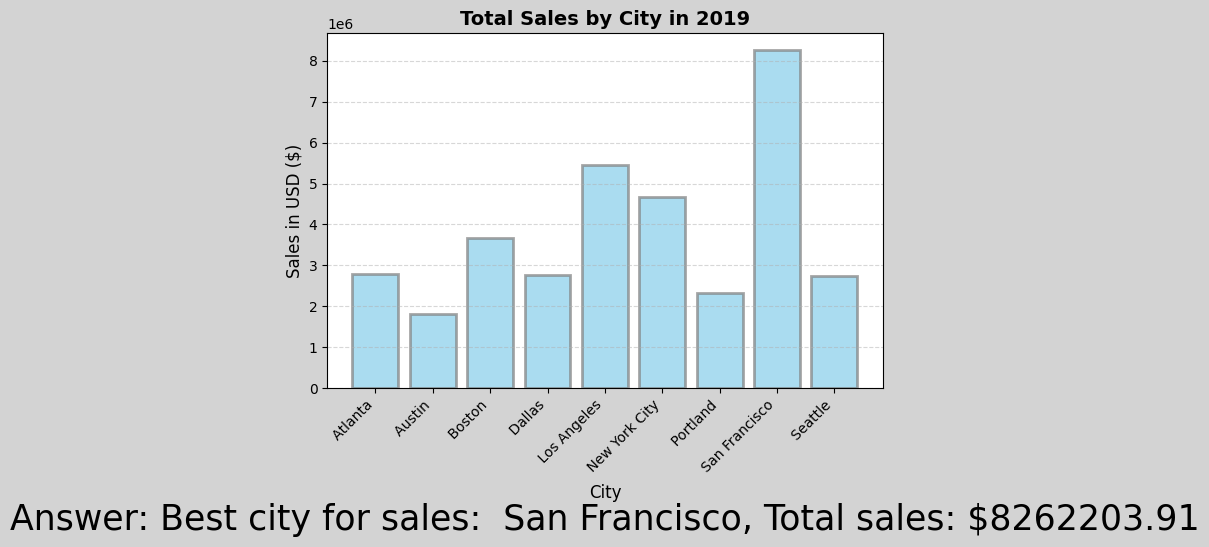

In [13]:
# Get the unique city names from the index of the grouped data
keys = All_2019.groupby(['City']).sum().index.tolist()

# Plotting the bar chart with customizations
plt.figure(figsize=(10, 6), facecolor='lightgrey')  # Adjusting the figure size and setting the background color
plt.bar(keys, All_2019.groupby(['City']).sum()['Sales'], color='skyblue', alpha=0.7, edgecolor='gray', linewidth=2)  # Adding edge color to the bars
plt.ylabel('Sales in USD ($)', fontsize=12)  # Adjusting the font size of the labels
plt.xlabel('City', fontsize=12)  # Adjusting the font size of the labels
plt.title('Total Sales by City in 2019', fontsize=14, fontweight='bold')  # Adding a title with increased font size and bold style
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding grid lines to the y-axis
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability

# Find the best city for sales and its corresponding value
best_city = All_2019.groupby(['City']).sum()['Sales'].idxmax()
best_sales = All_2019.groupby(['City']).sum()['Sales'].max()

# Adding text at the bottom of the plot
plt.text(0.5, -0.4, f'Answer: Best city for sales: {best_city}, Total sales: ${best_sales:.2f}', transform=plt.gca().transAxes, ha='center', fontsize=25)

plt.tight_layout()  # Adjusting the layout to prevent overlapping labels
plt.show()


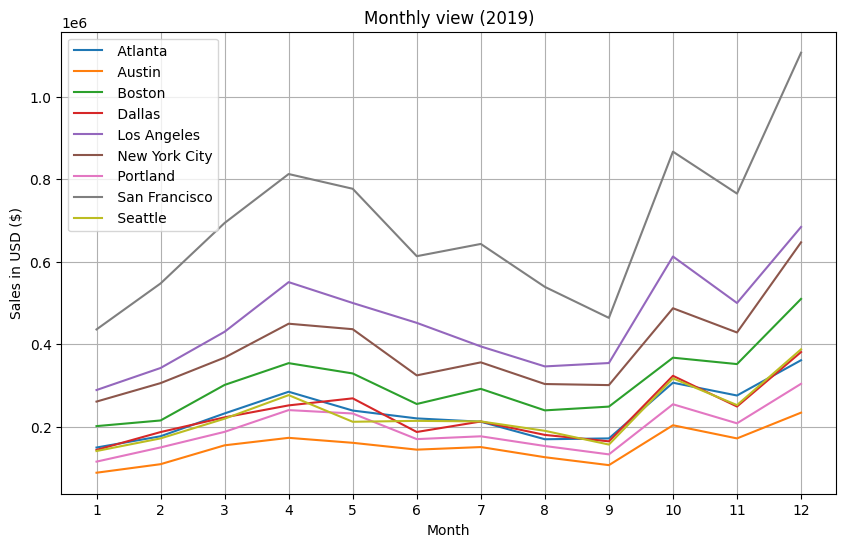

In [14]:
# Grouping data by both city and month
grouped_data = All_2019.groupby(['City', 'Month']).sum()

# Extracting unique cities and months for plotting
cities = grouped_data.index.get_level_values('City').unique()
months = range(1, 13)  # All months from 1 to 12

# Plotting sales for each city over different months
fig, ax = plt.subplots(figsize=(10, 6))
for city in cities:
    # Get sales data for the current city
    sales = grouped_data.loc[city]['Sales']
    
    # Create a list of sales data for all months, with 0 for missing months
    sales_for_all_months = [sales.get(month, 0) for month in months]
    
    # Plot the sales data for the current city
    ax.plot(months, sales_for_all_months, label=city)

ax.set_ylabel('Sales in USD ($)')
ax.set_xlabel('Month')
ax.set_title('Monthly view (2019)')
ax.legend()
plt.xticks(months)  # Set the x-axis ticks to be all months from 1 to 12
plt.grid(True)
plt.show()


## Question 3: What time should we display advertisemets to maximize likelihood of customer's buying product?

In [15]:
# Convert 'Order Date' to string
All_2019['Order Date'] = All_2019['Order Date'].astype(str)

# Extract characters
All_2019['Hour'] = All_2019['Order Date'].str[9:11]
All_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,09


# Answer:

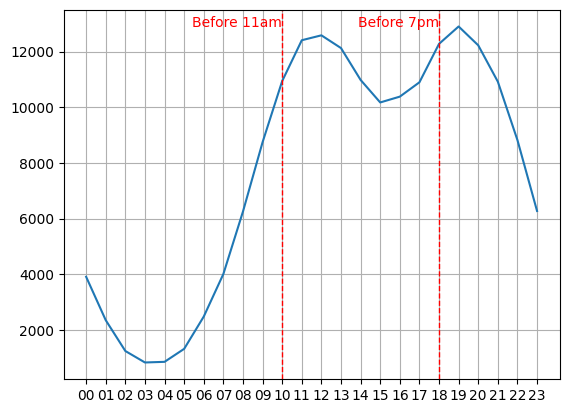

In [16]:
# Count occurrences by hour
hour_counts = All_2019['Hour'].value_counts().sort_index()

plt.plot(hour_counts.index, hour_counts.values)
plt.xticks(hour_counts.index)
plt.grid()

# Mark points slightly before 11am and 7pm
plt.axvline(x=10, color='r', linestyle='--', linewidth=1)  # slightly before 11am
plt.axvline(x=18, color='r', linestyle='--', linewidth=1)  # slightly before 7pm

# Adding text to explain the significance of the marked points
plt.text(10, max(hour_counts.values), 'Before 11am', color='r', ha='right')
plt.text(18, max(hour_counts.values), 'Before 7pm', color='r', ha='right')

plt.show()


## Question 4: What products are most often sold together?

In [17]:
# Filter rows where 'Order ID' appears multiple times
df = All_2019[All_2019['Order ID'].duplicated(keep=False)].copy()

# Group by 'Order ID' and concatenate 'Product' values
df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Keep only unique combinations of 'Order ID' and 'Grouped'
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

# Display the result
print(df2)


       Order ID                                            Grouped
3        176560                      Google Phone,Wired Headphones
18       176574                  Google Phone,USB-C Charging Cable
30       176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32       176586                AAA Batteries (4-pack),Google Phone
119      176672      Lightning Charging Cable,USB-C Charging Cable
...         ...                                                ...
186781   259296  Apple Airpods Headphones,Apple Airpods Headphones
186783   259297  iPhone,Lightning Charging Cable,Lightning Char...
186791   259303       34in Ultrawide Monitor,AA Batteries (4-pack)
186803   259314            Wired Headphones,AAA Batteries (4-pack)
186841   259350                  Google Phone,USB-C Charging Cable

[7136 rows x 2 columns]


# Answer:

In [18]:
from itertools import combinations
from collections import Counter

count = Counter()
products = []
counts = []

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Append the top 10 most common combinations to products and counts lists
for key, value in count.most_common(10):
    products.append(key)
    counts.append(value)
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


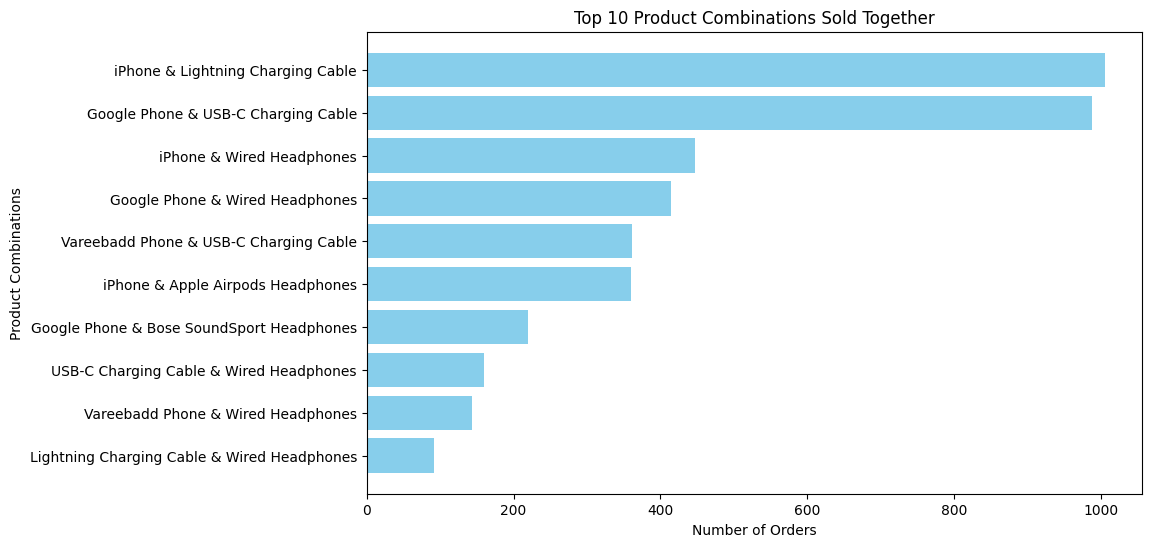

In [19]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(products)), counts, color='skyblue')
plt.yticks(range(len(products)), [f'{prod[0]} & {prod[1]}' for prod in products])
plt.xlabel('Number of Orders')
plt.ylabel('Product Combinations')
plt.title('Top 10 Product Combinations Sold Together')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()


# Product Connection Graph:

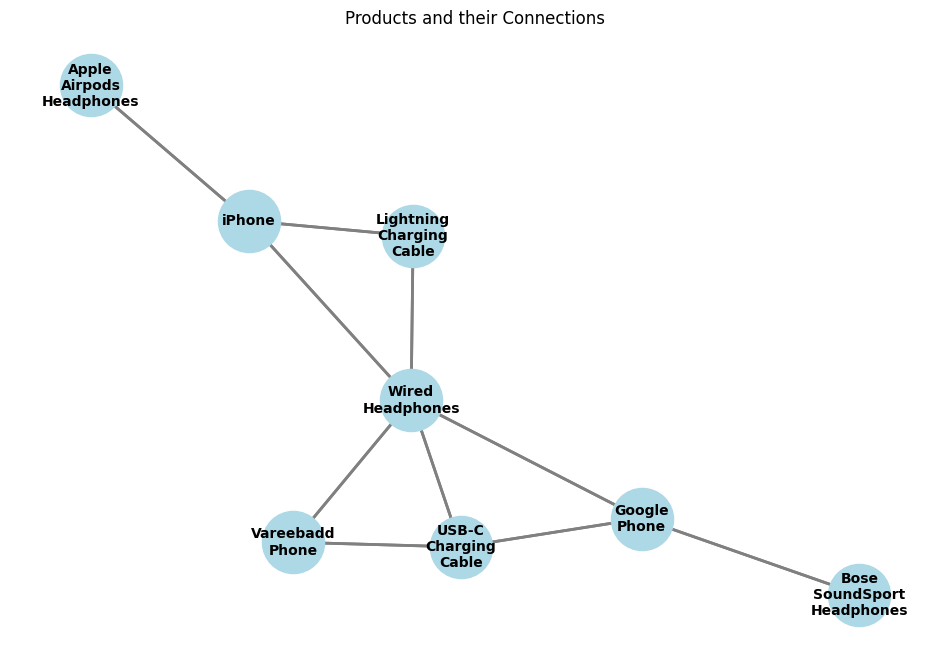

In [20]:
import networkx as nx


# Create a directed graph
G = nx.DiGraph()

# Define products and their connections
products = {
    'iPhone': ['Lightning Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones'],
    'Google Phone': ['USB-C Charging Cable', 'Wired Headphones', 'Bose SoundSport Headphones'],
    'Vareebadd Phone': ['USB-C Charging Cable', 'Wired Headphones'],
    'Lightning Charging Cable': ['iPhone', 'Wired Headphones'],
    'USB-C Charging Cable': ['Google Phone', 'Vareebadd Phone', 'Wired Headphones'],
    'Wired Headphones': ['iPhone', 'Google Phone', 'USB-C Charging Cable', 'Vareebadd Phone', 'Lightning Charging Cable'],
    'Apple Airpods Headphones': ['iPhone'],
    'Bose SoundSport Headphones': ['Google Phone']
}

# Add nodes and edges to the graph
for product, connections in products.items():
    G.add_node(product)
    for connected_product in connections:
        G.add_edge(product, connected_product)

# Define positions for better layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph with one word per line for node labels
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(G, pos, labels={k: '\n'.join(k.split()) for k in G.nodes()}, font_size=10, font_weight='bold', verticalalignment='center')
plt.title('Products and their Connections')
plt.axis('off')  # Turn off axis
plt.show()



## Question 5: What product sold the most?

# Answer:

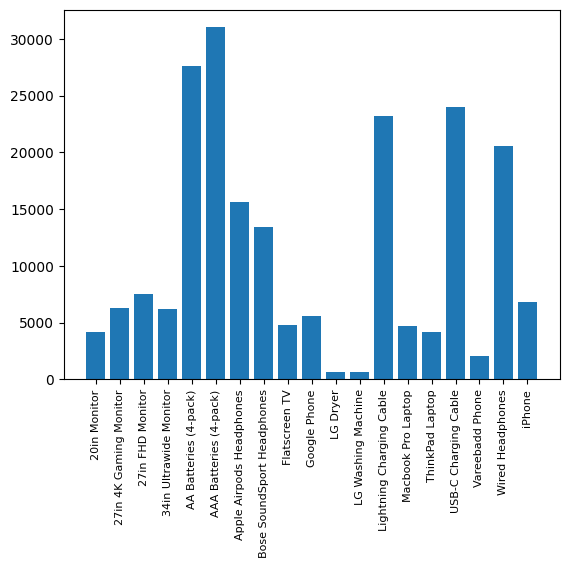

The most sold product is AAA Batteries (4-pack) with a total quantity ordered of 31017.


In [21]:
product_group = All_2019.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

# Find the product with the highest quantity ordered
most_sold_product = quantity_ordered.idxmax()
most_sold_quantity = quantity_ordered.max()

# Print the result
print(f"The most sold product is {most_sold_product} with a total quantity ordered of {most_sold_quantity}.")


# Extra: Comparing Price and Quantity Ordered

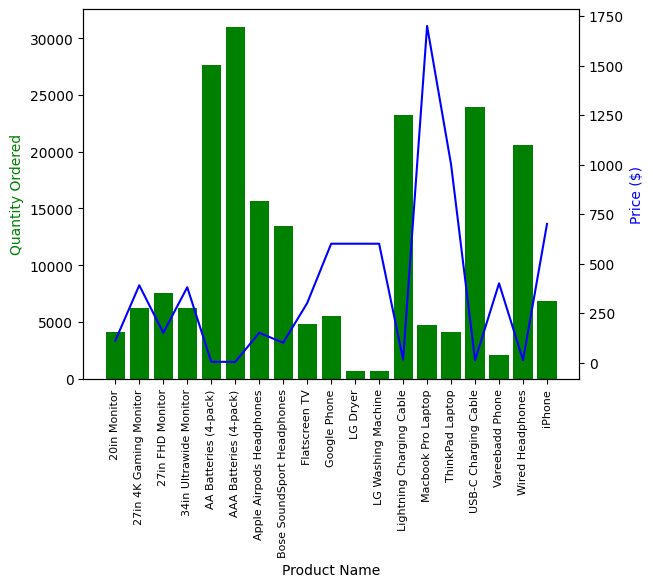

In [22]:
# Convert 'Price Each' column to numeric, coercing errors
All_2019['Price Each'] = pd.to_numeric(All_2019['Price Each'], errors='coerce')

# Drop rows with NaN values in the 'Price Each' column
All_2019_numeric = All_2019.dropna(subset=['Price Each'])

# Calculate mean prices grouped by 'Product'
prices = All_2019_numeric.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Set tick positions and then set labels
ax1.set_xticks(range(len(keys)))
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.show()